<a href="https://colab.research.google.com/github/Skyy-Dev/BT_AI/blob/main/EXPERIMENTAL_BT_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **L6 End-of-year project**

**Import Files**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/data')

ValueError: ignored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Alternatively, through a local machine**

In [ ]:
local_dir = '../Archive'

Before proceeding, check that the directory can be found

In [ ]:
os.listdir(local_dir)

NameError: ignored

**Importing libraries**

---



In [2]:
import os
import tensorflow as tf
import cv2 #checkout open cv
import imghdr #allows to check file extensions for images
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random
import shutil
#import scipy
from sklearn.model_selection import train_test_split
#import kaggle - will likely change

from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras.models import sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
#from keras.applications import EfficientNetB0
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix

GPU check optimisation

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

CPU / GPU debug

In [ ]:
tf.config.list_physical_devices(device_type=None)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**If running off a local machine, this line of code must be run to install all dependencies**

---



In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib #! || % at the beginning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.5 MB/s eta 0:00:00


**Importing and loading the data**

---



To import our data, we're going to be using an approach known as "Supervised learning". This is defined through pre-labelled datasets which the AI will be trained on. This is the best approach to solve a classification problem as the model can adjust itself and learn from its mistakes.

https://www.youtube.com/watch?v=_L2uYfVV48I

This is something that you do only for toy datasets or small sample sets. In the reality using image data generator is not recommended when you have huge volumes of images or video frames (which is usually the case). In those cases is a good practice to load and split the data across multiple tfrecords, then loading it progressively with tf.data and perform multithreaded augmentations dynamically during training. The majority of the augmentations can be computed using low level tf or common python functions.

In [3]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

**Loading the images**

---



**When using Colab, run the following lines of code from Google drive**

In [4]:
testing_path = '/content/drive/MyDrive/data/archive/Testing'
training_path = '/content/drive/MyDrive/data/archive/Training'
validation_path = '/content/drive/MyDrive/data/archive/Validation'

In [ ]:
#Temp folders
testing_path = '/content/drive/MyDrive/data/backup/Testing'
training_path = '/content/drive/MyDrive/data/backup/Training'
validation_path = '/content/drive/MyDrive/data/archive/Validation'

**If using the downloaded local file, run these lines of code**

In [ ]:
testing_path = '../Archive/Testing/'
training_path = '../Archive/Training/'
validation_path = '../Archive/Validation/'

Do **NOT** run them both, this will cause errors, only run the one which is applicable to you

**Performing a validation split**

---



Validation is typically recommended to be split 80/20

Splitting data into testing, training and validation

In [ ]:
for label in labels:
  train_dir = os.path.join(training_path, label)
  valid_dir = os.path.join(validation_path, label)
  T_files = os.listdir(train_dir)
  valid_split = int(len(T_files) * 0.2)
  valid_files = random.sample(T_files, valid_split)
  for file in valid_files:
    src = os.path.join(train_dir, file)
    dst = os.path.join(valid_dir, file)
    shutil.move(src, dst)

#https://www.v7labs.com/blog/train-validation-test-set

In [ ]:
x_train = [] #images?
y_train = [] #names?

size = 224

#img = cv2.imread(os.path.join(path, i))
#img = cv2.resize(img,(size, size))

for i in labels:  #training
  path = os.path.join(training_path, i)
  img = cv2.imread(os.path.join(training_path, i), interpolation = cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(224, 224))
  img /= 255
  x_train.append(img)
  y_train.append(i)
  #img = image.astype('float32')

for i in labels:
  path = os.path.join(testing_path, i)
  img = cv2.imread(os.path.join(testing_path, i))
  img = cv2.resize(img,(224, 224))
  img /= 255
  x_train.append(img)
  y_train.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train)

#for i in labels:
 # path = os.path.join(testing_path, i)

TypeError: ignored

In [18]:
x_train = [] 
y_train = [] 

x_test = []
y_test = []

size = 224

for i in labels:  
  # training set
  path = os.path.join(training_path, i)
  for file_name in os.listdir(path):
    img = cv2.imread(os.path.join(path, file_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (size, size))
    img = img.astype('float32') / 255.0
    x_train.append(img)
    y_train.append(i)

  # testing set
  path = os.path.join(testing_path, i)
  for file_name in os.listdir(path):
    img = cv2.imread(os.path.join(path, file_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (size, size))
    img = img.astype('float32') / 255.0
    x_test.append(img)
    y_test.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train)
#y_train = to_categorical(np.array(y_train))

x_test = np.array(x_test)
y_test = np.array(y_test)
#y_test = to_categorical(np.array(y_test))

In [10]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=101)

In [19]:
y_train_valid = []
y_train_valid = to_categorical(np.array(y_train))

y_test_valid = []
y_test_valid = to_categorical(np.array(y_test))


ValueError: ignored

In [ ]:
#ONE HOT ENCODING
#CHANGE THIS LATER - ANOTHER EXAMPLE
y_train_valid = []
for i in y_train:
  y_train_valid.append(labels.index(i))
y_train = y_train_valid
y_train = to_categorical(y_train)

y_test_valid = []
for i in y_test:
  y_test_valid.append(labels.index(i))
y_test = y_test_valid
y_test = to_categorical(y_test)

KeyError: ignored

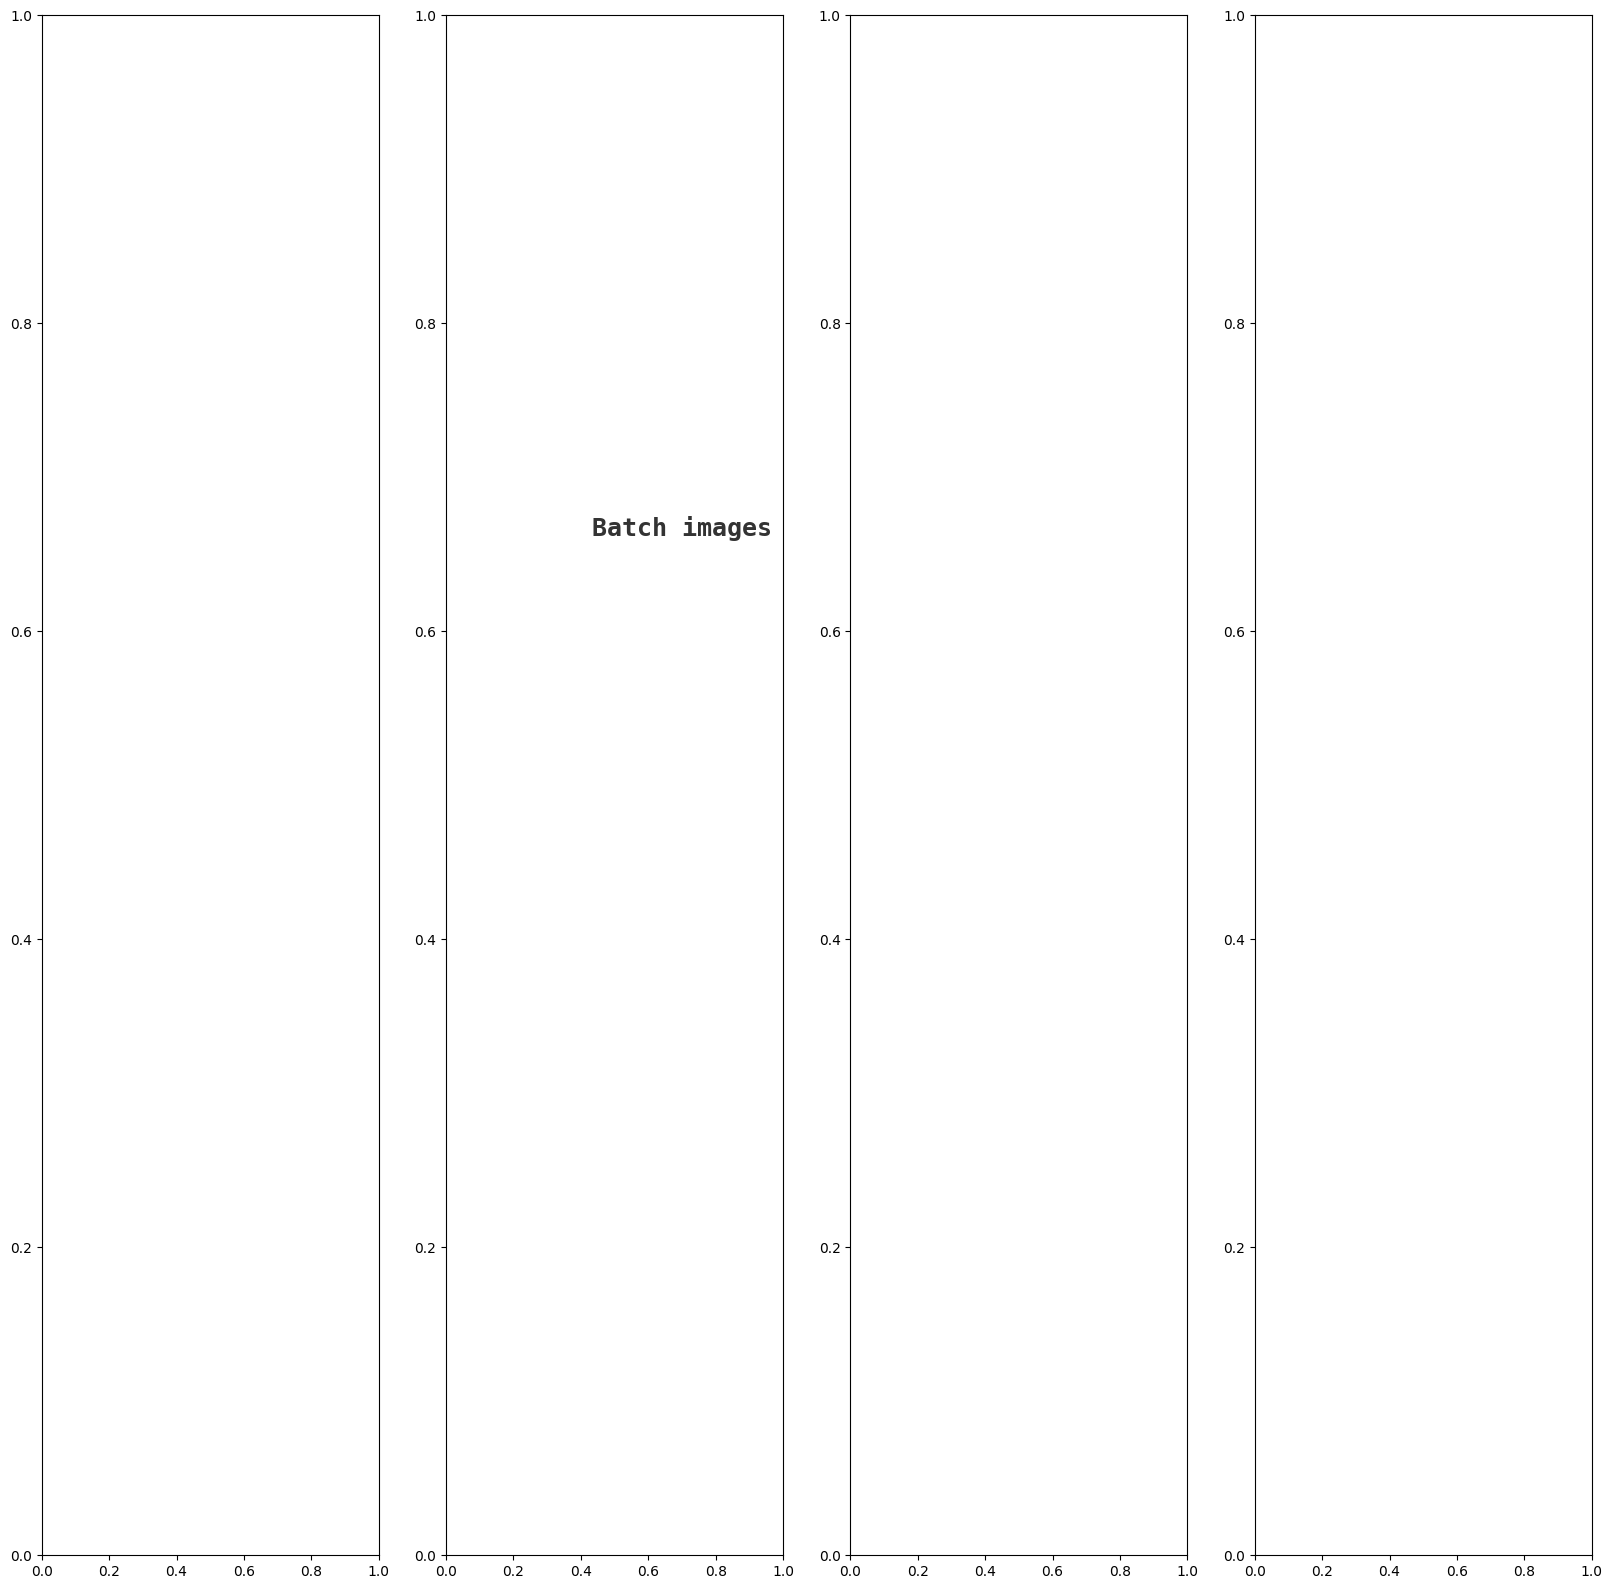

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
fig.text(s='Batch images', size = 18, fontweight = 'bold', fontname = 'monospace', y=0.62, x=0.4, alpha=0.8)
for i in range(4):
  ax_idx = label_dict[i] # get the index of the subplot for this label
  ax[ax_idx].imshow(x_train[i])
  ax[ax_idx].set_title(y_train[i])

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
fig.text(s='Batch images', size = 18, fontweight = 'bold', fontname = 'monospace', y=0.62, x=0.4, alpha=0.8)
for i in range(4):
  image = images[i]
  label = labels[i]
  label_index = label.argmax() #Because it's one-hot encoded it's pulling the highest value
  class_name = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'][label_index]
  ax[i].imshow(images[i])
  ax[i].set_title(class_name)

In [ ]:
y_train_onehot = []
for i in y_train:
  y_train_onehot.append(labels.index(i))
#num_classes = 10
y_train = y_onehot
y_train = tf.keras.utils.to_categorical(y_train)



ValueError: ignored

In [ ]:
for label in labels:
  vlid_dir = os.path.join(validation_path, label)
  

In [ ]:
testgen = tf.keras.preprocessing.image_dataset_from_directory(
    directory = testing_path,
    labels = 'inferred',
    label_mode= 'categorical',
    class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
    batch_size = 32,
    image_size = (150, 150),
    shuffle = True
)

traingen = tf.keras.preprocessing.image_dataset_from_directory(
    directory = training_path,
    labels = 'inferred',
    label_mode= 'categorical',
    class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
    batch_size = 32,
    image_size = (150, 150),
    shuffle = True
)

validgen = tf.keras.preprocessing.image_dataset_from_directory(
    directory = validation_path,
    labels = 'inferred',
    label_mode= 'categorical',
    class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
    batch_size = 32,
    image_size = (150, 150),
    shuffle = True
)

Found 394 files belonging to 4 classes.
Found 2870 files belonging to 4 classes.


ValueError: ignored

In [ ]:
#https://ibrahimsobh.github.io/kaggle-COVID19-Classification/
#https://www.datacamp.com/tutorial/complete-guide-data-augmentation
#https://kylewbanks.com/blog/train-validation-split-with-imagedatagenerator-keras

In [ ]:
#https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_directory/
#https://stackoverflow.com/questions/54263218/cnn-divide-images-into-training-validation-testing

img_size = 224 #Likely not necessary but could be used

classes = 4
#Normalising pixel values to be between 0 and 1
#shear_range=0.2, zoom_range=0.2, horizontal_flip=True
testing_data_generator = ImageDataGenerator(rescale = 1./255)
training_data_generator = ImageDataGenerator(rescale = 1./255, rotation_range=40,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        zoom_range=0.2,
        shear_range=0.2,
        horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale = 1./255)

testing_generator = testing_data_generator.flow_from_directory (testing_path,
                                                                target_size = (224, 224),
                                                                color_mode = 'rgb',
                                                                save_format = 'jpg',
                                                                batch_size = 32,
                                                                shuffle = False,
                                                                class_mode = 'categorical', #Automatically converts the class labels to a one-hot encoded form
                                                                classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'])

#Need to check these two and make sure they're configured correctly

training_generator = training_data_generator.flow_from_directory (training_path,
                                                                target_size = (224, 224),
                                                                color_mode = 'rgb',
                                                                save_format = 'jpg',
                                                                batch_size = 32,
                                                                class_mode = 'categorical',
                                                                shuffle = True, #Prevents overfitting but when evaluating model keep the data in its original order
                                                                subset = 'training',
                                                                #validation_split = 0.2,
                                                                classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'])

validation_generator = validation_data_generator.flow_from_directory (validation_path,
                                                                target_size = (224, 224),
                                                                color_mode = 'rgb',
                                                                save_format = 'jpg',
                                                                batch_size = 32,
                                                                class_mode = 'categorical',
                                                                #subset = 'validation',
                                                                classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'])


Found 394 images belonging to 4 classes.
Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [ ]:
pdct = training_generator.class_indices

Grabs data from the batch

In [ ]:
batch = images, labels = next(training_generator)

In [ ]:
label_keys = list(testing_generator.class_indices.keys()) # https://stackoverflow.com/questions/48373685/keras-imagedatagenerator-how-to-get-all-labels-from-data#51652128

In [ ]:
num_images = images.shape[0] #May remove

In [ ]:
ground_truth_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [ ]:
#NEED TO REWORK THIS - JUST AN EXAMPLE
for i in range(num_images):
  image = images[i]
  label = labels[i]

  label_index = label.argmax()

  class_name = ['giloma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'][label_index]

  plt.imshow(image)
  plt.title(class_name)
  plt.show()

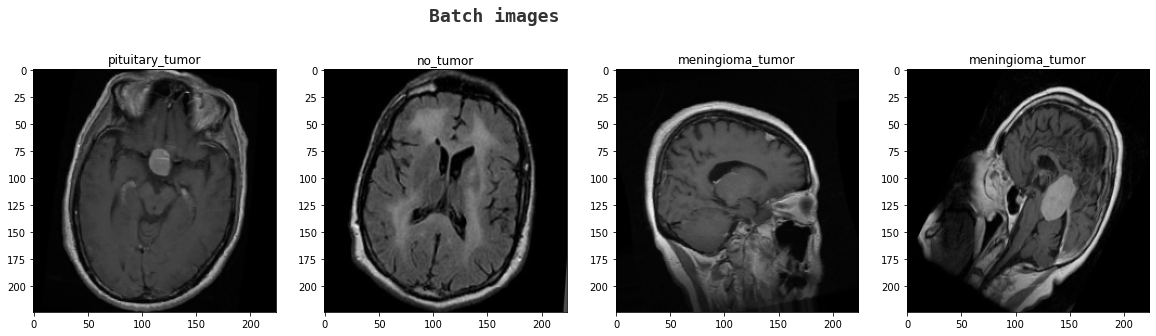

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
fig.text(s='Batch images', size = 18, fontweight = 'bold', fontname = 'monospace', y=0.62, x=0.4, alpha=0.8)
for i in range(4):
  image = images[i]
  label = labels[i]
  label_index = label.argmax() #Because it's one-hot encoded it's pulling the highest value
  class_name = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'][label_index]
  ax[i].imshow(images[i])
  ax[i].set_title(class_name)

Build the model

Transfer learning

Source: https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/

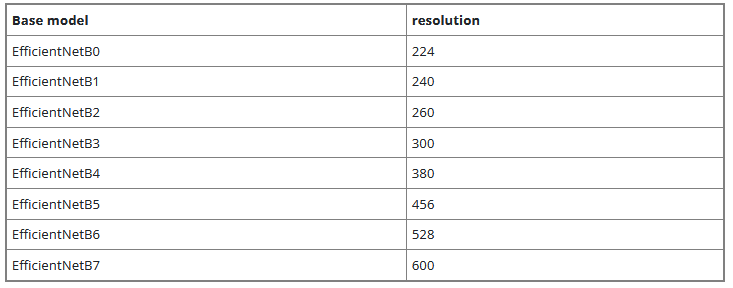

In [23]:
#Define the model
trnsfer_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#freeze the model
#trnsfer_model.trainable = False

#freeze model layers
for layer in trnsfer_model.layers:
  layer.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
#Define the model
trnsfer_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

#freeze the model
#trnsfer_model.trainable = False

#freeze model layers
for layer in trnsfer_model.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
print(len(trnsfer_model.layers))

311


In [ ]:
fine_tune = 100

In [ ]:
for layer in trnsfer_model.layers[:-4]:
  layer.trainable = False

Model

https://stackoverflow.com/questions/53825007/keras-cnn-model-training-time

In [ ]:
model = trnsfer_model.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dense(128, activation='relu')(model)
model = tf.keras.layers.Dropout(0.5)(model)
predict = tf.keras.layers.Dense(classes, activation='softmax')(model)

#for layer in trnsfer_model.layers[-5:]:
  #layer.trainable = True

model = keras.Model(inputs=trnsfer_model.input, outputs=predict)
model.summary()
#model.fit(training_generator, epochs=10, validation_data=validation_data_generator)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 150, 150, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 150, 150, 3)  7          ['rescaling_4[0][0]']            
 )                                                                                                
                                                                                            

In [24]:
x = trnsfer_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.models.Model(inputs=trnsfer_model.input, outputs=predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
x = trnsfer_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(68, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.models.Model(inputs=trnsfer_model.input, outputs=predictions)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(trnsfer_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
trnsfer_model_rate = 0.0001

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
val_data = []
val_labels = []
for i in range(len(validation_generator)):
    batch_val_data, batch_val_labels = validation_generator.next()
    val_data.append(batch_val_data)
    val_labels.append(batch_val_labels)

x_val = np.concatenate(val_data)
y_val = np.concatenate(val_labels)

In [ ]:
#FOR FIT - validation_data=(x_val, y_val)

validation data expects a tuple

In [26]:
history = model.fit(x_train, y_train, epochs=12, batch_size=32)

Epoch 1/12
72/72 [==============================] - 23s 90ms/step - loss: 1.0567 - accuracy: 0.6313
Epoch 2/12
72/72 [==============================] - 5s 68ms/step - loss: 0.5439 - accuracy: 0.7880
Epoch 3/12
72/72 [==============================] - 5s 71ms/step - loss: 0.4244 - accuracy: 0.8394
Epoch 4/12
72/72 [==============================] - 5s 68ms/step - loss: 0.3437 - accuracy: 0.8694
Epoch 5/12
72/72 [==============================] - 5s 68ms/step - loss: 0.3053 - accuracy: 0.8846
Epoch 6/12
72/72 [==============================] - 5s 71ms/step - loss: 0.2678 - accuracy: 0.8960
Epoch 7/12
72/72 [==============================] - 5s 69ms/step - loss: 0.2612 - accuracy: 0.8999
Epoch 8/12
72/72 [==============================] - 5s 70ms/step - loss: 0.1877 - accuracy: 0.9295
Epoch 9/12
72/72 [==============================] - 5s 71ms/step - loss: 0.2045 - accuracy: 0.9190
Epoch 10/12
72/72 [==============================] - 5s 70ms/step - loss: 0.1679 - accuracy: 0.9395
Epoch 11

In [ ]:
history = model.fit(training_generator, epochs=10, validation_data=validation_generator, callbacks=[reduce_lr, earlystop])

Epoch 1/10
72/72 [==============================] - 900s 12s/step - loss: 1.1716 - accuracy: 0.5572 - val_loss: 0.6204 - val_accuracy: 0.7609 - lr: 0.0010
Epoch 2/10
72/72 [==============================] - 45s 624ms/step - loss: 0.6954 - accuracy: 0.7240 - val_loss: 0.6242 - val_accuracy: 0.7644 - lr: 0.0010
Epoch 3/10
72/72 [==============================] - 42s 584ms/step - loss: 0.6414 - accuracy: 0.7471 - val_loss: 0.5358 - val_accuracy: 0.8028 - lr: 0.0010
Epoch 4/10
72/72 [==============================] - 42s 590ms/step - loss: 0.5815 - accuracy: 0.7749 - val_loss: 0.5817 - val_accuracy: 0.7574 - lr: 0.0010
Epoch 5/10
72/72 [==============================] - 42s 590ms/step - loss: 0.5875 - accuracy: 0.7693 - val_loss: 0.5811 - val_accuracy: 0.7714 - lr: 0.0010
Epoch 6/10
72/72 [==============================] - 42s 589ms/step - loss: 0.5069 - accuracy: 0.8089 - val_loss: 0.4791 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 7/10
72/72 [==============================] - 42s 590ms/ste

In [ ]:
history.history

{'loss': [1.2797695398330688,
  0.6280422806739807,
  0.48722800612449646,
  0.4399113953113556,
  0.3429298996925354,
  0.32599976658821106,
  0.27062320709228516,
  0.2884131968021393,
  0.21931934356689453,
  0.2089240998029709,
  0.17977024614810944,
  0.1665630340576172,
  0.14311930537223816,
  0.17525482177734375,
  0.1658886969089508,
  0.17453332245349884,
  0.15545019507408142,
  0.1255149245262146,
  0.12484604120254517,
  0.08683755248785019],
 'accuracy': [0.6181976199150085,
  0.753156304359436,
  0.8019155263900757,
  0.8302133083343506,
  0.8663474321365356,
  0.8746190667152405,
  0.8929038047790527,
  0.8846321105957031,
  0.9181541204452515,
  0.9155420064926147,
  0.9307792782783508,
  0.9329560399055481,
  0.9442751407623291,
  0.9329560399055481,
  0.9373095631599426,
  0.9320853352546692,
  0.9364388585090637,
  0.951676070690155,
  0.9538528323173523,
  0.9699608087539673],
 'val_loss': [0.5872824192047119,
  0.5666194558143616,
  0.45594289898872375,
  0.476052

In [27]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss and Accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['val_accuracy', 'accuracy'], loc='upper left')
plt.show()

KeyError: ignored

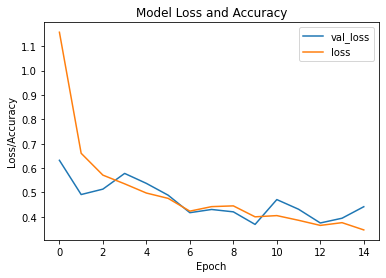

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss and Accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'loss'], loc='upper right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(testing_generator)
print('Test accuracy:', test_acc)

13/13 [==============================] - 15s 1s/step - loss: 2.0573 - accuracy: 0.2690
Test accuracy: 0.2690355181694031


In [ ]:
test_loss, test_acc = model.evaluate(testing_generator)
print('Test accuracy:', test_acc)

13/13 [==============================] - 84s 7s/step - loss: 1.1030 - accuracy: 0.6320
Test accuracy: 0.6319797039031982


In [ ]:
conf_mat = confusion_matrix(labels, )

In [ ]:
model.predict(testing_generator)

13/13 [==============================] - 2s 152ms/step


array([[5.6673682e-01, 8.0959134e-02, 2.6835960e-03, 3.4962043e-01],
       [1.9065236e-01, 5.9267748e-02, 6.8491983e-01, 6.5160014e-02],
       [2.7758121e-02, 2.4898282e-01, 7.1870321e-01, 4.5559122e-03],
       ...,
       [2.2987684e-02, 1.1679311e-01, 3.3321546e-04, 8.5988593e-01],
       [1.6510794e-03, 9.6524000e-02, 4.8819777e-05, 9.0177608e-01],
       [2.0294588e-03, 1.2607613e-01, 5.7319667e-05, 8.7183696e-01]],
      dtype=float32)

13/13 [==============================] - 3s 152ms/step
[[46 36 15  3]
 [18 94  1  2]
 [10 15 76  4]
 [ 4 15  5 50]]


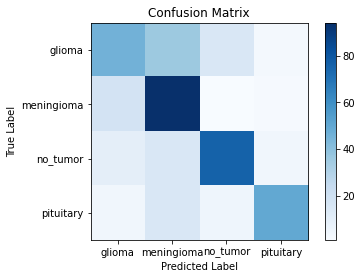

In [ ]:
#loss, acc = model.evaluate(testing_generator)
#print('Test accuracy:', acc)
from sklearn.metrics import classification_report

y_pred = model.predict(testing_generator)
y_pred = np.argmax(y_pred, axis=1)


y_true = testing_generator.classes

#print(classification_report(labels, y_pred))

cm = confusion_matrix(y_true, y_pred)
print(cm)


plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1, 2, 3], ['glioma', 'meningioma', 'no_tumor', 'pituitary'])
plt.yticks([0, 1, 2, 3], ['glioma', 'meningioma', 'no_tumor', 'pituitary'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Saving model and weights

In [ ]:
save_path = '/content/drive/MyDrive/data/'

In [ ]:
model.save('/content/drive/MyDrive/data/bt_ai_test2-67acc-1lss-20-03-23.h5')  #Try including path here next time

In [28]:
#EXPERIMENTAL
model.save('/content/drive/MyDrive/data/bt_ai_EXP1-95acc-15lss-01-04-23.h5')

In [ ]:
save_weights_path = '/content/drive/MyDrive/data/Weights'

In [ ]:
model.save_weights(save_weights_path)

Load the model

---



In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/data/bt_ai_test2-67acc-1lss-20-03-23.h5")

In [ ]:
reconstructed_model.predict(testing_generator)

13/13 [==============================] - 125s 10s/step


array([[5.6667680e-01, 8.0949545e-02, 2.6835918e-03, 3.4969005e-01],
       [1.9048363e-01, 5.9262242e-02, 6.8514693e-01, 6.5107189e-02],
       [2.7761335e-02, 2.4899101e-01, 7.1869081e-01, 4.5568938e-03],
       ...,
       [2.2992535e-02, 1.1680970e-01, 3.3333601e-04, 8.5986447e-01],
       [1.6508327e-03, 9.6518852e-02, 4.8806476e-05, 9.0178150e-01],
       [2.0281754e-03, 1.2606995e-01, 5.7270932e-05, 8.7184459e-01]],
      dtype=float32)

13/13 [==============================] - 97s 7s/step
[[46 36 15  3]
 [18 94  1  2]
 [10 15 76  4]
 [ 4 15  5 50]]


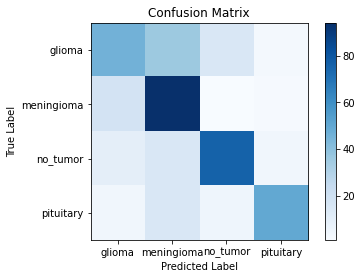

In [ ]:
#loss, acc = model.evaluate(testing_generator)
#print('Test accuracy:', acc)
from sklearn.metrics import classification_report

y_pred = reconstructed_model.predict(testing_generator)
y_pred = np.argmax(y_pred, axis=1)


y_true = testing_generator.classes

#print(classification_report(labels, y_pred))

cm = confusion_matrix(y_true, y_pred)
print(cm)


plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1, 2, 3], ['glioma', 'meningioma', 'no_tumor', 'pituitary'])
plt.yticks([0, 1, 2, 3], ['glioma', 'meningioma', 'no_tumor', 'pituitary'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

POTENTIALLY REDUNDANT CODE BELOW

In [ ]:
image = np.array(Image.open("test.jpg").resize((384, 384)))
print("shape: ", image.shape)
shape: (384, 384, 3)
pr_mask = model.predict(image).round()

In [ ]:
img = cv2.imread('/content/drive/MyDrive/data/archive/Testing/glioma_tumor/image(25).jpg')
print(img.shape)

(477, 541, 3)


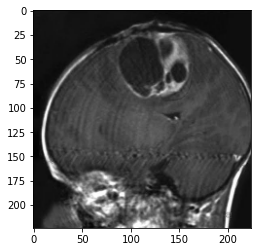

In [ ]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

TensorShape([224, 224, 3])

In [ ]:
np.expand_dims(resize, 0).shape

(1, 224, 224, 3)

In [ ]:
imge = cv2.resize(img, (224, 224))
imge = np.array(img)
imge = np.expand_dims(img, axis=0)

Viewing from a single image

In [ ]:
#meningioma
/content/drive/MyDrive/data/archive/Testing/meningioma_tumor/image(1).jpg

#glioma
/content/drive/MyDrive/data/archive/Testing/glioma_tumor/image(13).jpg

#None
/content/drive/MyDrive/data/archive/Testing/no_tumor/image(102).jpg

#pituitary
/content/drive/MyDrive/data/archive/Testing/pituitary_tumor/image(27).jpg

#wrong
/content/drive/MyDrive/data/archive/Testing/glioma_tumor/image(13).jpg

(380, 360, 3)
1/1 [==============================] - 9s 9s/step
meningioma identified
1


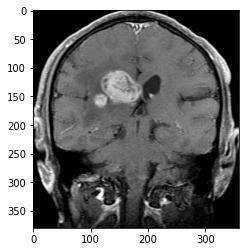

In [ ]:
import cv2
#https://tree.rocks/get-heatmap-from-cnn-convolution-neural-network-aka-grad-cam-222e08f57a34

img = cv2.imread('/content/drive/MyDrive/data/archive/Testing/glioma_tumor/image(13).jpg')
print(img.shape)
plt.imshow(img)
img = cv2.resize(img, (224, 224))

img = np.array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

predict = reconstructed_model.predict(img)
predict = np.argmax(predict,axis=1)[0]

if predict == 0:
  print("glioma identified")
if predict == 1:
  print("meningioma identified")
if predict == 2:
  print("No tumor identified")
if predict == 3:
  print("pituitary identified")
print(predict)

(278, 440, 3)
1/1 [==============================] - 0s 53ms/step
Prediction: meningioma_tumor (confidence: 84.06%)


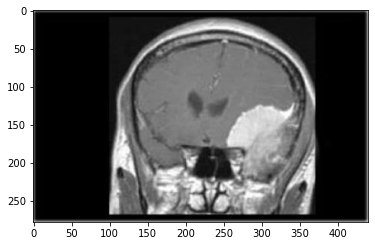

In [ ]:
import cv2
from scipy.special import softmax
#from tf.keras.applications import decode_predictions
#https://tree.rocks/get-heatmap-from-cnn-convolution-neural-network-aka-grad-cam-222e08f57a34

img = cv2.imread('/content/drive/MyDrive/data/archive/Testing/meningioma_tumor/image(1).jpg')
print(img.shape)
plt.imshow(img)
img = cv2.resize(img, (224, 224))

img = np.array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

predict = reconstructed_model.predict(img)
#predict = np.argmax(predict,axis=1)[0]
#probability = softmax(predict)
#arr_list = probability.tolist()
percent = predict * 100

#probability = softmax(predict)
predicted_label_idx = np.argmax(predict, axis=1)[0]
predicted_label = labels[predicted_label_idx]
confidence = percent[0][predicted_label_idx]

#TRY EDIT FROM HERE ------

#for i in enumerate(labels):
  #print(f"{label} {confidence:.2f}")

#-----

print(f"Prediction: {predicted_label} (confidence: {confidence:.2f}%)")


#print(f"Prediction: {predicted_label} (confidence: {confidence:.2f})")

#results = tf.keras.applications.imagenet_utils.decode_predictions(predict)

#for i, p in enumerate(percent):
  #print("{:.2f".format({arr_list}))
#print(f"Prediction{percent}%")

In [ ]:
print(testing_generator.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
#from PIL import Image
#image = np.array(Image.open("/content/drive/MyDrive/data/archive/Testing/glioma_tumor/image(25).jpg").resize((224, 224)))
#p = reconstructed_model.predict(image)
#p = np.argmax(p,axis=1)[0]

ValueError: ignored

In [ ]:
#y_pred = model.predict(testing_generator)
#y_pred = np.argmax(y_pred, axis=1)
#OpenCV
#import OpenCV

#resize = tf.image.resize(img, (224, 224))
#resize = img.reshape(224,224,3)
#resize = img.reshape(0,224,224,3)
resize = cv2.resize(img, (224,224))
resize = img.reshape(0,224,224,3)
#plt.imshow(resize.numpy().astype(int))
plt.show()
#tst_img = tf.keras.utils.load_img(img)
#print(img)

#resize = img.reshape(224,224,3)
#resize = img.reshape(224, 224, 3)
#plt.imshow(resize.numpy().astype(int))
    #p = model.predict(img)
    #p = np.argmax(p,axis=1)[0]

p = reconstructed_model.predict(resize)
p = np.argmax(p,axis=1)[0]

#load_image()

(477, 541, 3)


ValueError: ignored

In [ ]:
gil_img = '/content/drive/MyDrive/data/archive/Testing/glioma_tumor/image(16).jpg'
menin_img = '/content/drive/MyDrive/data/archive/Testing/meningioma_tumor/image(42).jpg'
no_img = '/content/drive/MyDrive/data/archive/Testing/no_tumor/image(86).jpg'
pitu_img = '/content/drive/MyDrive/data/archive/Testing/pituitary_tumor/image(77).jpg'

In [ ]:
#y_pred = model.predict(testing_generator)
#y_pred = np.argmax(y_pred, axis=1)
#OpenCV
img =cv2.imread('/content/drive/MyDrive/data/archive/Testing/glioma_tumor/image(16).jpg')

#resize = tf.image.resize(img, (224, 224))
#plt.imshow(resize.numpy().astype(int))
plt.show()
#tst_img = tf.keras.utils.load_img(img)
#print(img)

resize = img.reshape(224,224,3)
plt.imshow(resize.numpy().astype(int))
    #p = model.predict(img)
    #p = np.argmax(p,axis=1)[0]

p = model.predict(resize)
p = np.argmax(p,axis=1)[0]

#load_image()

ValueError: ignored

In [ ]:
# load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

KeyError: ignored

Fine-tune the model

In [ ]:
for images, labels in testgen.batch(batch_size = 32):
    

In [ ]:
x = testing_generator.next()

NameError: name 'scipy' is not defined

In [ ]:
testing_path[1]

'.'

In [ ]:
tf.keras.utils.to_categorical(testing_data_generator, num_classes=4, dtype="uint8")

NameError: name 'testing_data_generator' is not defined

Test code below, can delete or use as backup if things go wrong

In [ ]:
training = []
training_label = []

testing = []
testing_label = []

#test_path = os.listdir('/content/drive/MyDrive/data/archive/Training')

for i in testing_path:
  image = cv2.imread(testing_path, cv2.IMREAD_COLOR)
  image = cv2.resize(image, (150, 150))
  image = image / 255.0 #normalisation if above chunk of code works, will likely not need to apply this
  testing.append(image)
  testing_label.append(labels)

error: ignored

Next I'll likely use Keras’ ImageDataGenerator function to augment the dataset

In [ ]:
#Example: https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_directory/
#src_path_train = "data/train/"
#src_path_test = "data/test/"

#adjust this function

data_agument = ImageDataGenerator(
    rotation_range = 20,
    zoom_range = 0.05,
    width_shift_range = 0.05,
    height_shift_range = 0.05,
    shear_range = 0.05,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.20
)

#train_datagen = ImageDataGenerator(
        #rescale=1 / 255.0,
        #rotation_range=20,
        #zoom_range=0.05,
        #width_shift_range=0.05,
        #height_shift_range=0.05,
        #shear_range=0.05,
        #horizontal_flip=True,
        #fill_mode="nearest",
        #validation_split=0.20)

#test_datagen = ImageDataGenerator(rescale=1 / 255.0)